In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ln=np.log; exp=np.exp; frame=pd.DataFrame; shape=np.shape; concatenate=np.concatenate

#The following produces a dataframe with the important quantities
#Note that the labels in the code do not correspond to the labels in the paper. The labels in the dataframe do
def bayesprob(fg,e=3):
    lamda0=fg['lamda0'];
    a0=fg['a0'];n0=fg['n0'];theta=fg['theta'];delta=fg['delta'];phi=fg['phi'];a_r=fg['a_r'];n_r=fg['n_r']
    pie=f(np.linspace(10**-e,1-10**-e,1000))
    mu0=lamda0*a0+(1-lamda0)*a_r
    pies,sup,prob=disc(pie,delta,mu0)
    surprise=abs(pies-mu0)
    s=pies<mu0 
    vl,vu,v=dolam(lamda0,a0,mu0,surprise,s)
    a=doA(a0,theta,pies,mu0,s)
    vl_=v*pies/a
    vu_=v*(1-pies)/(1-a)
    lamda1=s*vl_+(1-s)*vu_
    n,N=Nandn(lamda1,lamda0,phi,n0)
    x=fx(N,pies,n,a)
    XoN=x/N 
    mypie=men(a=a_r,n=n_r,N=N,X=x)
    V=frame(cc([f(a),f(n),f(N),f(x),f(XoN),f(lamda1),mypie,mu0*ones(1000),a0*ones(1000),prob,mypie-pie]))
    V.columns=[r'$a$',r'$n$',r'$N$',r'$x$',r'$x/N$',r'$λ$',r'$p$',r'$π_{0}$',r'$a_{0}$',r'$δ$',r'$p$' + '-' + r'$π_{s}$']
    V.index=np.linspace(10**-e,1-10**-e,1000)
    return V

def cc(ob):
    if type(ob[0])==pd.core.frame.DataFrame or type(ob[0])==pd.core.series.Series:
        return pd.concat(ob,axis=1)
    else:
        return concatenate(ob,axis=1)

def pltsize(x1=10,x2=16):
    plt.rcParams['figure.figsize'] = [x2, x1]
    return

def rows(x):
    return shape(f(x))[0]

def f(x):
    if type(x) !=np.ndarray:
        x=np.array(x)
    x=twodm(x)
    return x

def twodm(x): 
    s=shape(x)
    if len(s)>2:
        x=np.squeeze(x)
        s=shape(x)    
    if len(s)==1:
        x=x.reshape(s[0],1)
    if len(s)==0:
        x=x.reshape(1,1)
    return x

def ones(ob):
    return twodm(np.ones(ob))

def dolam(lamda0,a0,mu0,surprise,s):
    T=ones(rows(surprise))
    vl=T*lamda0*a0/(mu0)            
    vu=T*lamda0*(1-a0)/(1-mu0)  
    v=s*vl+(1-s)*vu
    return vl,vu,v

def doA(a0,theta,pies,mu0,s):
    a_l=a0*(pies/mu0)**theta
    a_u=1-(1-a0)*((1-pies)/(1-mu0))**theta
    a=s*a_l+(1-s)*a_u
    return a    
    
def Nandn(lamda1,lamda0,phi,n0):
    r=(1/lamda1-1)
    tau0=(1/lamda0-1)
    k=n0*(tau0**(1-phi))
    N=k*r**phi
    n=k*r**(phi-1)
    return n,N

def fx(N,pie,n=2,a=0.5):
    return (n+N)*pie-n*a


def fx(N,pie,n=2,a=0.5):
    return (n+N)*pie-n*a

def men(a,n,N,X):
    return (n*a+X)/(n+N)

def disc(pie,delta,mu0,eta=0.1,iter=10):
    mu_bar0=pie_bar(eta=eta,pie=mu0,v=delta[0])
    sup=pie-mu_bar0
    v=delta[0]
    for i in range(iter):
        v=logit(delta[0],delta[1],pie-mu_bar0)
        pie_i, pie_d,pie_av=pie_actual(eta,pie,v=v)
        mu_bar0=pie_bar(eta=eta,pie=mu0,v=v)
    return pie_av,sup,v

def pie_bar(eta,pie,v=0.5):
    a=v+(1-v)*eta
    b=1-v*(1-eta)
    c=(1-eta)*(1-2*v)
    return a*pie /(b-c*pie)

def logit(v0,v1,x,b=4):
    c=ln(v0)-ln(1-v0)
    y=exp(c+b*v1*x)
    return y/(1+y)

def omega(eta,pie):
    om_i=eta+(1-eta)*(1-pie)
    om_d=eta+(1-eta)*pie
    return om_i, om_d

def pie_actual(eta,pie,v=0.5):
    om_i, om_d=omega(eta,pie)
    pie_i=pie/om_i+(om_i-1)/om_i
    pie_d=pie/om_d
    pie_av=(pie-v*(1-om_i))/(v*om_i+(1-v)*om_d)
    return pie_i, pie_d,pie_av
 
def graphout(V,fg,fig,ax):
    lamda0=fg['lamda0'];
    a0=fg['a0'];n0=fg['n0'];theta=fg['theta'];delta=fg['delta'];phi=fg['phi'];a_r=fg['a_r'];n_r=fg['n_r']
    V[[r'$x/N$',r'$p$']].plot(grid=True,ax=ax[0],xlabel=pie_,fontsize=12)
    V[[r'$N$']].plot(grid=True,ax=ax[1],xlabel=pie_,fontsize=12)
    V[[r'$n$']].plot(grid=True,ax=ax[2],xlabel=pie_,fontsize=10)
    V[[r'$a$']].plot(grid=True,ax=ax[3],xlabel=pie_,fontsize=12,ylim=(0,1))
    V[[r'$a_{0}$']].plot(grid=True,ax=ax[3],xlabel=pie_,fontsize=12,ylim=(0,1))
    V[[r'$p$' + '-' + r'$π_{s}$']].plot(grid=True,ax=ax[4],xlabel=pie_,fontsize=12,ylim=(-.5,.5))
    settings=r'$λ_0$' +'='+ str(lamda0)+' , ' +r'$n_{0}$'+'='+ str(n0) +' , ' +r'$a_{0}$'+'='+ str(a0) +' , ' +r'$θ$'+'='+ str(theta) 
    settings=settings +' , '+ r'$ϕ$'+'='+ str(phi)   +' , '+ r'$δ$'+'='+ str(delta)+' , ' +  r'$n_r$'+'='+ str(n_r)+' , '  r'$a_r$'+'='+ str(a_r)
    #settings=''
    fig.suptitle(settings, y=1.1, fontsize=18  )
    return


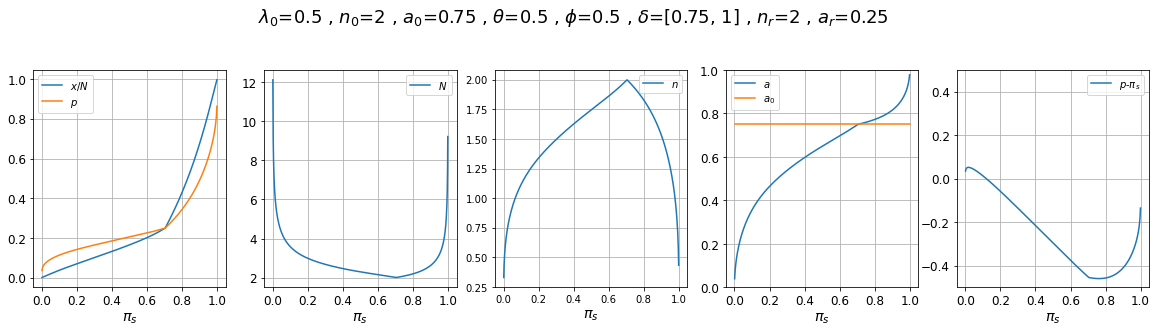

In [79]:
import matplotlib.pylab as pylab; params = {'axes.labelsize': 'x-large'};pylab.rcParams.update(params)

#Set the prior parameters here
fg={'lamda0':.5,'a0':0.75, 'n0':2 ,'theta':0.5,'delta':[.75,1],'phi':.5  ,'a_r':0.25 ,'n_r':2}

#This produces a dataframe (V) indexed by the stated probability
V=bayesprob(fg)
pltsize(4,20);fig,ax=plt.subplots(1,5)
graphout(V,fg,fig,ax)

